In [ ]:
# Import Tensorflow & librairies
import tensorflow as tf
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics.pairwise import cosine_distances


import wordcloud
import string

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
# Je donne accès à colab à mon drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importation du dataset provenant d'un fichier csv
#création d'un data frame pandas avec le dataset
df = pd.read_csv('/content/drive/MyDrive/Projets_Jedha/Data/sample-data_north_face.csv')
df.head()

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


In [ ]:
# Remove punctuation and lower case the whole text
df['description_clean'] = df['description'].str.replace(r"[!\"#$%&()*+,-./:;<=>?@[\\\]^_`{|}~]+", " ")
df['description_clean'] = df['description_clean'].fillna('').apply(lambda x: x.lower())

SyntaxError: invalid syntax (<ipython-input-4-95f35607ccaa>, line 6)

In [ ]:
df

,id,description,description_clean
0,1,Active classic boxers - There's a reason why o...,active classic boxers theres a reason why our...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory r...
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable nof...
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch t...
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and ...
...,...,...,...
495,496,Cap 2 bottoms - Cut loose from the maddening c...,cap 2 bottoms cut loose from the maddening cr...
496,497,Cap 2 crew - This crew takes the edge off fick...,cap 2 crew this crew takes the edge off fickl...
497,498,All-time shell - No need to use that morning T...,alltime shell no need to use that morning tim...
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...,allwear cargo shorts allwear cargo shorts bas...


In [ ]:
# Import English using en_core_web_sm.load()
import en_core_web_sm
# Import english stop words
from spacy.lang.en.stop_words import STOP_WORDS
nlp = en_core_web_sm.load()

In [ ]:
df['description_clean'] = df['description_clean'].apply(lambda x: nlp(x))
df

,id,description,description_clean
0,1,Active classic boxers - There's a reason why o...,"(active, classic, boxers, , there, s, a, reas..."
1,2,Active sport boxer briefs - Skinning up Glory ...,"(active, sport, boxer, briefs, , skinning, up..."
2,3,Active sport briefs - These superbreathable no...,"(active, sport, briefs, , these, superbreatha..."
3,4,"Alpine guide pants - Skin in, climb ice, switc...","(alpine, guide, pants, , skin, in, climb, ice..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...","(alpine, wind, jkt, , on, high, ridges, steep..."
...,...,...,...
495,496,Cap 2 bottoms - Cut loose from the maddening c...,"(cap, 2, bottoms, , cut, loose, from, the, ma..."
496,497,Cap 2 crew - This crew takes the edge off fick...,"(cap, 2, crew, , this, crew, takes, the, edge..."
497,498,All-time shell - No need to use that morning T...,"(alltime, shell, , no, need, to, use, that, m..."
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...,"(allwear, cargo, shorts, , allwear, cargo, sh..."


In [ ]:
#df['description_token'] = df['description_doc'].apply(lambda x: [token.text for token in x if token.text not in STOP_WORDS])
df['description_tokenized'] = df['description_clean'].apply(lambda x:[token.lemma_ for token in x if token.lemma_ not in STOP_WORDS])
df



,id,description,description_clean,description_tokenized
0,1,Active classic boxers - There's a reason why o...,"(active, classic, boxers, , there, s, a, reas...","[active, classic, boxer, , s, reason, boxer, ..."
1,2,Active sport boxer briefs - Skinning up Glory ...,"(active, sport, boxer, briefs, , skinning, up...","[active, sport, boxer, brief, , skin, glory, ..."
2,3,Active sport briefs - These superbreathable no...,"(active, sport, briefs, , these, superbreatha...","[active, sport, brief, , superbreathable, nof..."
3,4,"Alpine guide pants - Skin in, climb ice, switc...","(alpine, guide, pants, , skin, in, climb, ice...","[alpine, guide, pant, , skin, climb, ice, swi..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...","(alpine, wind, jkt, , on, high, ridges, steep...","[alpine, wind, jkt, , high, ridge, steep, ice..."
...,...,...,...,...
495,496,Cap 2 bottoms - Cut loose from the maddening c...,"(cap, 2, bottoms, , cut, loose, from, the, ma...","[cap, 2, , cut, loose, madden, crowd, search,..."
496,497,Cap 2 crew - This crew takes the edge off fick...,"(cap, 2, crew, , this, crew, takes, the, edge...","[cap, 2, crew, , crew, edge, fickle, weather,..."
497,498,All-time shell - No need to use that morning T...,"(alltime, shell, , no, need, to, use, that, m...","[alltime, shell, , need, use, morning, time, ..."
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...,"(allwear, cargo, shorts, , allwear, cargo, sh...","[allwear, cargo, short, , allwear, cargo, sho..."


In [ ]:
df["clean_token"] = [" ".join(x) for x in df['description_tokenized']]
df

,id,description,description_clean,description_tokenized,clean_token
0,1,Active classic boxers - There's a reason why o...,"(active, classic, boxers, , there, s, a, reas...","[active, classic, boxer, , s, reason, boxer, ...",active classic boxer s reason boxer cult fav...
1,2,Active sport boxer briefs - Skinning up Glory ...,"(active, sport, boxer, briefs, , skinning, up...","[active, sport, boxer, brief, , skin, glory, ...",active sport boxer brief skin glory require ...
2,3,Active sport briefs - These superbreathable no...,"(active, sport, briefs, , these, superbreatha...","[active, sport, brief, , superbreathable, nof...",active sport brief superbreathable nofly bri...
3,4,"Alpine guide pants - Skin in, climb ice, switc...","(alpine, guide, pants, , skin, in, climb, ice...","[alpine, guide, pant, , skin, climb, ice, swi...",alpine guide pant skin climb ice switch rock...
4,5,"Alpine wind jkt - On high ridges, steep ice an...","(alpine, wind, jkt, , on, high, ridges, steep...","[alpine, wind, jkt, , high, ridge, steep, ice...",alpine wind jkt high ridge steep ice alpine ...
...,...,...,...,...,...
495,496,Cap 2 bottoms - Cut loose from the maddening c...,"(cap, 2, bottoms, , cut, loose, from, the, ma...","[cap, 2, , cut, loose, madden, crowd, search,...",cap 2 cut loose madden crowd search undone c...
496,497,Cap 2 crew - This crew takes the edge off fick...,"(cap, 2, crew, , this, crew, takes, the, edge...","[cap, 2, crew, , crew, edge, fickle, weather,...",cap 2 crew crew edge fickle weather clearing...
497,498,All-time shell - No need to use that morning T...,"(alltime, shell, , no, need, to, use, that, m...","[alltime, shell, , need, use, morning, time, ...",alltime shell need use morning time umbrella...
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...,"(allwear, cargo, shorts, , allwear, cargo, sh...","[allwear, cargo, short, , allwear, cargo, sho...",allwear cargo short allwear cargo short bask...


In [ ]:
texts = df['clean_token']
texts

0      active classic boxer   s reason boxer cult fav...
1      active sport boxer brief   skin glory require ...
2      active sport brief   superbreathable nofly bri...
3      alpine guide pant   skin climb ice switch rock...
4      alpine wind jkt   high ridge steep ice alpine ...
                             ...                        
495    cap 2   cut loose madden crowd search undone c...
496    cap 2 crew   crew edge fickle weather clearing...
497    alltime shell   need use morning time umbrella...
498    allwear cargo short   allwear cargo short bask...
499    allwear short   time simplify allwear short pr...
Name: clean_token, Length: 500, dtype: object

In [ ]:
# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

# X is a generator. We can transform that as an array
dense = X.toarray()

In [ ]:
dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df_tf_idf = pd.DataFrame(dense, columns = [x for x in vectorizer.get_feature_names_out()])

df_tf_idf.columns

Index(['06', '07', '08', '09', '10', '100', '100gram', '101', '102', '103',
       ...
       'zippers', 'zippersli', 'zippersliulbrbrbfabric', 'zippingli',
       'zippocket', 'zips', 'zipsecurity', 'zipthrough', 'zone', 'zonesli'],
      dtype='object', length=5865)

In [ ]:
### Part 1 : Groups of products with similar descriptions

# Training of a clustering model** that will create groups of products for which the descriptions are "close" to each other.
#DBSCAN

db = DBSCAN(eps=0.75, min_samples=7, metric="cosine", algorithm="brute")

# Fit on data
db.fit(dense)

# Visualize with plotly

## Import go to build our own figure
import plotly.graph_objects as go

fig = go.Figure()

# Loop through each label for our cluster
for i in np.unique(db.labels_):
    label = dense[db.labels_ == i]
    fig.add_trace(go.Scatter(x=label[:, 0], y=label[:, 1], mode="markers", name="Cluster {}".format(i)))

fig.show()

In [ ]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:

# Assuming 'dbscan' is your DBSCAN object and 'dense' is your dataset
for i in np.unique(db.labels_):
    # Extract the data points corresponding to the current label
    label = dense[db.labels_ == i]
    # Print the label and the data points
    print(f"Cluster label: {i}")
    print(label)
    print("\n")

Cluster label: -1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Cluster label: 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Cluster label: 1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Cluster label: 2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Cluster label: 3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Cluster label: 4
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [

In [ ]:
dense.shape

(500, 5865)

In [ ]:
label.shape

(7, 5865)

In [ ]:
label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

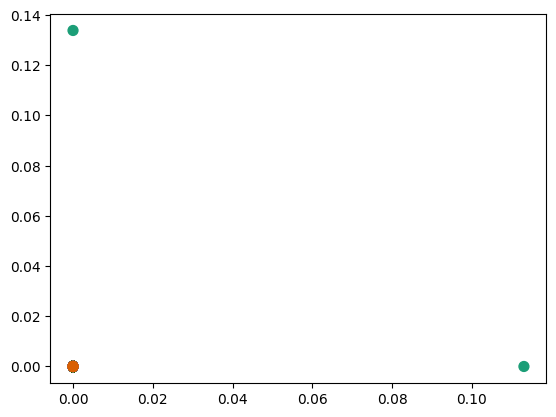

In [ ]:
plt.scatter(dense[:, 0], dense[:, 1], c = db.labels_, s=50, cmap='Dark2')


In [ ]:
"""# Loop through each label for our cluster
for i in np.unique(db.labels_):
    label = dense[db.labels_ == i]

    # Debugging print to check the number of points in each cluster
    print(f"Cluster {i}: {label.shape[0]} points")
"""

'# Loop through each label for our cluster\nfor i in np.unique(db.labels_):\n    label = dense[db.labels_ == i]\n\n    # Debugging print to check the number of points in each cluster\n    print(f"Cluster {i}: {label.shape[0]} points")\n'

In [ ]:
df['cluster'] = db.labels_
df.head()

,id,description,description_clean,description_tokenized,clean_token,cluster
0,1,Active classic boxers - There's a reason why o...,"(active, classic, boxers, , there, s, a, reas...","[active, classic, boxer, , s, reason, boxer, ...",active classic boxer s reason boxer cult fav...,3
1,2,Active sport boxer briefs - Skinning up Glory ...,"(active, sport, boxer, briefs, , skinning, up...","[active, sport, boxer, brief, , skin, glory, ...",active sport boxer brief skin glory require ...,-1
2,3,Active sport briefs - These superbreathable no...,"(active, sport, briefs, , these, superbreatha...","[active, sport, brief, , superbreathable, nof...",active sport brief superbreathable nofly bri...,-1
3,4,"Alpine guide pants - Skin in, climb ice, switc...","(alpine, guide, pants, , skin, in, climb, ice...","[alpine, guide, pant, , skin, climb, ice, swi...",alpine guide pant skin climb ice switch rock...,2
4,5,"Alpine wind jkt - On high ridges, steep ice an...","(alpine, wind, jkt, , on, high, ridges, steep...","[alpine, wind, jkt, , high, ridge, steep, ice...",alpine wind jkt high ridge steep ice alpine ...,2


In [ ]:
fig = px.scatter(df, x="id", y="cluster", color="cluster",
                 title="Clusters by ID")

fig.show()

In [ ]:
no_clusters = len(np.unique(db.labels_) )
no_noise = np.sum(np.array(db.labels_) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 15
Estimated no. of noise points: 145


In [ ]:
"""no_clusters = len(np.unique(cluster_labels) )
no_noise = np.sum(np.array(cluster_labels) == -1, axis=0)
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise) #eps=0.75, min_samples=6

"""

"no_clusters = len(np.unique(cluster_labels) )\nno_noise = np.sum(np.array(cluster_labels) == -1, axis=0)\nprint('Estimated no. of clusters: %d' % no_clusters)\nprint('Estimated no. of noise points: %d' % no_noise) #eps=0.75, min_samples=6\n\n"

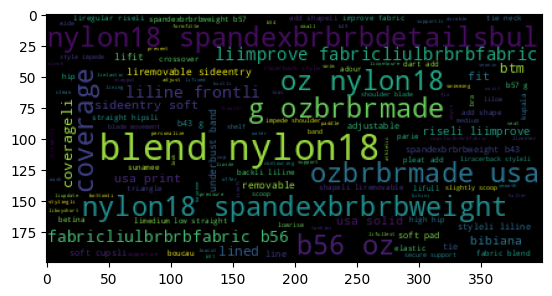

In [ ]:
    wd = wordcloud.WordCloud()

    text = " ".join(df[df['cluster'] == 1]['clean_token'])
    cloud = wd.generate(text)
    plt.imshow(cloud)

In [ ]:
wd = wordcloud.WordCloud()

# A function to create a worldcloud for an specific cluster
def plot_wordcloud(cluster):
    texts = " ".join(df[df['cluster'] == cluster]['clean_token'])
    cloud = wd.generate(texts)
    plt.title(f'Cluster {cluster} Word Cloud')
    plt.imshow(cloud)
    plt.show()

# Generate word clouds for each cluster
#On aplique la function à chaque cluster avec une boucle for
unique_clusters = sorted(df['cluster'].unique())
for cluster in unique_clusters:
    if cluster != -1:
      cluster_text = df[df['cluster'] == cluster]['clean_token']
      plot_wordcloud(cluster)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#RECOMMENDER SYSTEM

#- Create a function named `find_similar_items` that takes an argument `item_id` representing the id of a product, and that returns a list of 5 item ids that belong to the same cluster as the product passed in argument
#- Use python's `input()` function to allow the user to choose a product and perform some suggestions of similar item

In [ ]:
data = df[df['id'] == 20]['cluster']

In [ ]:
data.iloc[0]

3

In [ ]:
df[df['id'] == 20]

,id,description,description_clean,description_tokenized,clean_token,cluster
19,20,Cap 1 graphic t-shirt - This tee is made from ...,"(cap, 1, graphic, tshirt, , this, tee, is, ma...","[cap, 1, graphic, tshirt, , tee, lightestweig...",cap 1 graphic tshirt tee lightestweight capi...,3


In [ ]:
def find_cluster():
  item_id = input("Enter item ID: ")
  item_id = int(item_id)
  if item_id in df['id'].values:
        cluster_num = df[df['id'] == item_id]['cluster'].iloc[0]
        print(f'Cluster number: {cluster_num}')
  else:
        print(f'Id {item_id} not found in the database')

In [ ]:
find_cluster()

Enter item ID: 20
Cluster number: 3


In [ ]:
df[df['cluster'] == 3]['id'].sample(n=5)

493    494
418    419
340    341
20      21
487    488
Name: id, dtype: int64

In [ ]:
def find_similar_items ():
  import random
  item_id = input("Enter item ID: ")
  item_id = int(item_id)
  if item_id in df['id'].values:
        cluster_num = df[df['id'] == item_id]['cluster'].iloc[0]
        list_items = df[df['cluster'] == cluster_num]['id'].tolist()
        #list_items = list(df[df['cluster'] == cluster_num]['id'].sample(n=5).values)

        #on élimine l'item indiqué par l'utilisateur de la liste.
        list_items.remove(item_id)

        #on fait un sample de 5 items à partir de la liste d'items d'un cluster une fois exclu l'item indiqué par l'utilisateur en input
        five_similar_items = random.sample(list_items, 5)
        print(f'You may like this other items: {five_similar_items}')
  else:
        print(f'Id {item_id} not found in the database')

In [ ]:
find_similar_items()


Enter item ID: 20
You may like this other items: [263, 413, 21, 360, 388]


In [ ]:
#Part 3
#TRUNCATED SVD

In [ ]:
col_list = ['topic_'  + str(x) for x in range(1,15)]
col_list

['topic_1',
 'topic_2',
 'topic_3',
 'topic_4',
 'topic_5',
 'topic_6',
 'topic_7',
 'topic_8',
 'topic_9',
 'topic_10',
 'topic_11',
 'topic_12',
 'topic_13',
 'topic_14']

In [ ]:
svd_model = TruncatedSVD(n_components=15, n_iter=100, random_state=0)
lsa = svd_model.fit_transform(X)

n_components = 15

#On crée un dataframe avec tous les differents sujets identifiées
#On crée les noms des colonnes pour chaque sujet à travers une comprehesion list
#On ajoute une dernière colonne avec les observations (le texte analysé par le modèle)

topic_encoded_df = pd.DataFrame(lsa, columns = ['topic_'  + str(x) for x in range(1,16)])

topic_encoded_df["documents"] = df['clean_token']
topic_encoded_df

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,documents
0,0.244505,-0.060038,0.141031,0.109808,-0.108265,-0.014684,-0.010831,-0.061486,0.060503,-0.047310,-0.042949,0.019860,0.031145,-0.021534,-0.039370,active classic boxer s reason boxer cult fav...
1,0.199702,-0.073815,0.067153,0.077198,-0.024705,0.028634,-0.022861,-0.025885,-0.012895,-0.025082,-0.057997,0.181597,0.012465,0.052340,0.023593,active sport boxer brief skin glory require ...
2,0.182481,-0.075905,0.065163,0.038805,-0.037739,0.050310,-0.030964,0.044403,-0.017175,-0.020945,-0.015993,0.191878,-0.036675,0.046075,0.041748,active sport brief superbreathable nofly bri...
3,0.270251,-0.208285,-0.107656,-0.071923,0.025549,-0.026528,-0.012358,-0.067326,-0.032345,0.018661,-0.155748,0.016436,0.043859,-0.032980,-0.035580,alpine guide pant skin climb ice switch rock...
4,0.318154,-0.256837,-0.033580,-0.172067,-0.068949,-0.016653,0.044119,0.033776,-0.093468,0.086616,-0.146711,0.012631,0.047411,-0.098615,-0.156523,alpine wind jkt high ridge steep ice alpine ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.310366,-0.112953,0.341144,0.135461,-0.302445,-0.034661,0.048648,-0.104838,0.159174,-0.181096,-0.126898,0.052345,0.066015,-0.090486,0.026306,cap 2 cut loose madden crowd search undone c...
496,0.336348,-0.103627,0.429095,0.067725,-0.352520,-0.022208,0.008328,-0.004249,0.121966,-0.144270,-0.058558,-0.001794,0.086644,-0.122418,0.008701,cap 2 crew crew edge fickle weather clearing...
497,0.279808,-0.203439,-0.074207,-0.202627,-0.030821,-0.049723,0.224046,0.025755,-0.001484,0.033711,0.007472,-0.138677,-0.077545,0.050702,0.050131,alltime shell need use morning time umbrella...
498,0.284343,0.062748,-0.142010,0.293081,0.101445,-0.099343,-0.030799,-0.006381,0.066792,-0.097960,-0.007434,-0.120401,-0.050708,0.101618,-0.046802,allwear cargo short allwear cargo short bask...


In [ ]:
topics_columns_list = ['topic_'  + str(x) for x in range(1,16)]
for i in topics_columns_list:
  index_max_value = topic_encoded_df[i].idxmax()
  print(index_max_value)


72
490
259
462
265
254
152
436
68
68
152
354
64
64
381


In [ ]:
topics_columns_list = ['topic_'  + str(x) for x in range(1,16)]

for i in topics_columns_list:
  index_max_value = topic_encoded_df[i].idxmax()
  topic_text = topic_encoded_df.loc[index_max_value, 'documents']
  cloud = wd.generate(topic_text)
  plt.title(f'{i} Word Cloud')
  plt.imshow(cloud)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.